# Challenge - Hardwork Pays Off 

Predicting Exam Scores using Machine Learning
Since you are a student of Coding Blocks, you are expected to work hard and get better results than others. To track your time and expected performance in the Machine Learning Challenge, Prateek bhayia has asked to you install walkatime on your device which is an efficient time tracking tool to track your daily coding activity. It measures how much time you have spend on coding daily.

Challenge

In this challenge, Prateek bhayia gives you walkatime data of his past students and how they performed in the evaluation exam. Your task is to predict the score you will get given the amount of time you spend on coding daily.

Input-You are given one feature corresponding to time noted by walkatime.

Output-A scalar denoting the level of perfomance student achived by devoting the given time.

In [34]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Loading the dataset
dfx=pd.read_csv("./Linear_X_Train.csv")
dfy=pd.read_csv("./Linear_Y_Train.csv")

In [94]:
#Converting dataframes into numpy array
X=dfx.values
y=dfy.values
X1=X.reshape((X.shape[0],))
y1=y.reshape((y.shape[0],))

#Printing shape of data
print(X1.shape)
print(y1.shape)

(3750,)
(3750,)


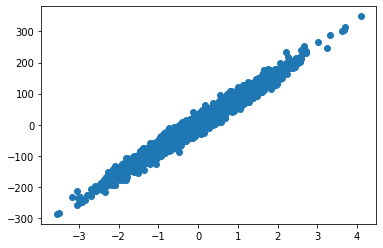

In [95]:
#Visualising the data
plt.scatter(X1,y1)
plt.show()

In [96]:
#Hypothesis function for approximation line
def hypothesis(x,theta):
    return theta[0]+theta[1]*x

In [97]:
#Error function

def error(X1,y1,theta):
    
    m=X1.shape[0]
    error=0
    
    for i in range(m):
        hx=hypothesis(X1[i],theta)
        error+=(hx-y1[i])**2
        
    return error

In [98]:
#Gradient w.r.t to theta[0] and theta[1]

def gradient(X1,y1,theta):
    
    grad=np.zeros((2,))
    m=X1.shape[0]
    
    for i in range(m):
        hx=hypothesis(X1[i],theta)
        grad[0]+=(hx-y1[i])
        grad[1]+=(hx-y1[i])*X1[i]
    return grad


In [103]:
#Gradient Descent (updating theta)

def gradientDescent(X1,y1,learning_rate=0.00001):
    
    theta=np.array([-2.0,0.0])
    itr=0
    max_itr=200
    error_list=[]
    theta_list=[]
    
    while(itr<max_itr):
        grad=gradient(X1,y1,theta)
        err=error(X1,y1,theta)
        error_list.append(err)
        theta_list.append((theta[0],theta[1]))
        
        theta[0]=theta[0]-learning_rate*grad[0]
        theta[1]=theta[1]-learning_rate*grad[1]
        itr+=1
    return theta,error_list,theta_list

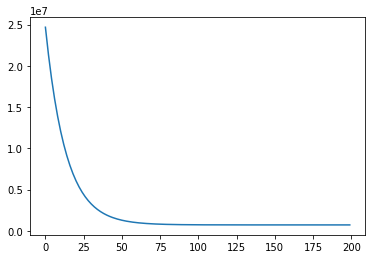

[ 3.71293757 80.49783642]


In [104]:
#Function call
final_theta,error_list,theta_list=gradientDescent(X1,y1)
plt.plot(error_list)
plt.show()
print(final_theta)

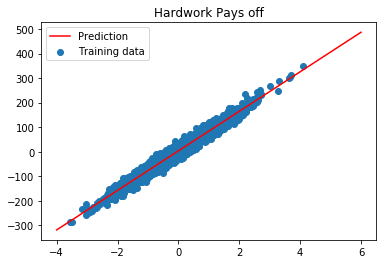

In [105]:
#Plot for testing data


plt.scatter(X1,y1,label='Training data')
xtest=np.linspace(-4,6,10)

plt.plot(xtest,hypothesis(xtest,final_theta),label='Prediction',color='red')
plt.title("Hardwork Pays off")
plt.legend()
plt.show()

# Testing data

In [108]:
Xtest=pd.read_csv("./Linear_X_Test.csv")
Xtest=Xtest.values
Xtest=Xtest.reshape((Xtest.shape[0],))

In [109]:
print(Xtest.shape)

(1250,)


In [113]:
pred=[]
for i in range(Xtest.shape[0]):
    pred.append(int(np.round(hypothesis(Xtest[i],final_theta))))

In [114]:
print(pred)

[-147, -66, -200, 226, 51, -101, -12, 27, -62, -117, -11, 10, -37, 68, 12, -9, 26, 108, 177, 23, -31, 22, -52, -147, 69, 110, 155, 12, 35, -92, 131, 64, -19, 120, 167, -90, -151, 11, -41, 27, 37, 6, 24, 138, -49, 30, 50, -46, -15, 115, 156, 114, 47, -69, -177, 18, 11, -50, -72, -21, -9, 45, -75, 38, -77, 69, 135, 104, -54, -122, -160, 56, -120, -153, 44, 96, 18, -6, 150, 46, -56, -89, -110, 65, -76, -16, -92, -42, 17, 43, -136, 52, -66, -3, 85, 74, -59, -5, 24, 5, 108, -112, 22, -191, 49, -12, 130, -49, 8, -74, 89, -16, 100, -74, -77, -101, 48, -20, -149, 48, 8, 28, -9, 74, -25, -79, -4, 4, 1, -6, 22, -69, -39, -60, -28, 5, -45, 14, -45, 84, 47, -46, 201, -69, -71, -71, 23, 114, -11, 59, 24, 114, -77, -139, 13, -30, -29, -114, 24, -19, -8, -62, 111, 15, 93, -19, 103, -7, -164, -31, -25, -51, -6, 94, 81, 14, 35, 81, -47, -193, 52, 100, -103, -93, -29, -149, 136, -31, 230, 246, 72, 46, 57, 132, -26, -82, 59, 87, 23, -156, 56, 48, -27, -41, -32, -121, 1, -66, 7, -167, -99, 36, 81, 80, 113

In [116]:
pred=np.array(pred)
print(pred.shape)

(1250,)


In [117]:
df=pd.DataFrame(pred,columns=["y"])
df.to_csv("HardworkResult.csv",index=False)